In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [25]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder('image/Pistachio_Image_Dataset/train', transform=train_transforms)
test_dataset = datasets.ImageFolder('image/Pistachio_Image_Dataset/test', transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [26]:
class RBFNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RBFNet, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.rbf = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        x = self.hidden(x)
        x = torch.tanh(x)
        x = self.rbf(x)
        return x

In [27]:
# input_size = 64 * 64 * 3
# hidden_size = 100
# output_size = 2

# rbf_net = RBFNet(input_size, hidden_size, output_size)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(rbf_net.parameters(), lr=0.001)

# num_epochs = 10

# for epoch in range(num_epochs):
#     train_loss = 0.0
#     train_correct = 0
#     train_total = 0

#     for inputs, labels in train_loader:
#         inputs = inputs.view(-1, input_size)
#         optimizer.zero_grad()
#         outputs = rbf_net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item() * inputs.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         train_total += labels.size(0)
#         train_correct += (predicted == labels).sum().item()
#         # print("predicted value :",predicted,"  train loss :",train_loss,"\n")
    
#     train_loss /= len(train_loader.dataset)
#     print("predicted :",predicted,"\n","train correct :",train_correct,"\n","train total :",train_total,"\n")
#     print(train_loss ,"\n")


In [33]:
input_size = 64 * 64 * 3
hidden_size = 100
output_size = 2
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

rbf_net = RBFNet(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rbf_net.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    val_loss = 0.0
    val_acc = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.view(-1, input_size)
        optimizer.zero_grad()
        outputs = rbf_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (outputs.argmax(1) == labels).sum().item()

    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)
    train_acc /= len(train_loader.dataset)
    train_acc_history.append(train_acc)

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.view(-1, input_size)
            outputs = rbf_net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.argmax(1) == labels).sum().item()

    val_loss /= len(test_loader)
    val_loss_history.append(val_loss)
    val_acc /= len(test_loader.dataset)
    val_acc_history.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f}, train acc: {train_acc:.4f}, val loss: {val_loss:.4f}, val acc: {val_acc:.4f}')

Epoch 1/10, train loss: 0.5485, train acc: 0.7312, val loss: 0.4063, val acc: 0.8201
Epoch 2/10, train loss: 0.4433, train acc: 0.8002, val loss: 0.3844, val acc: 0.8338
Epoch 3/10, train loss: 0.4556, train acc: 0.7905, val loss: 0.4315, val acc: 0.8083
Epoch 4/10, train loss: 0.4330, train acc: 0.8028, val loss: 0.3756, val acc: 0.8387
Epoch 5/10, train loss: 0.4101, train acc: 0.8267, val loss: 0.3770, val acc: 0.8407
Epoch 6/10, train loss: 0.4484, train acc: 0.8002, val loss: 0.3802, val acc: 0.8358
Epoch 7/10, train loss: 0.4189, train acc: 0.8161, val loss: 0.4320, val acc: 0.8142
Epoch 8/10, train loss: 0.4285, train acc: 0.8179, val loss: 0.3922, val acc: 0.8437
Epoch 9/10, train loss: 0.4077, train acc: 0.8258, val loss: 0.3928, val acc: 0.8319
Epoch 10/10, train loss: 0.4101, train acc: 0.8152, val loss: 0.3867, val acc: 0.8378


0


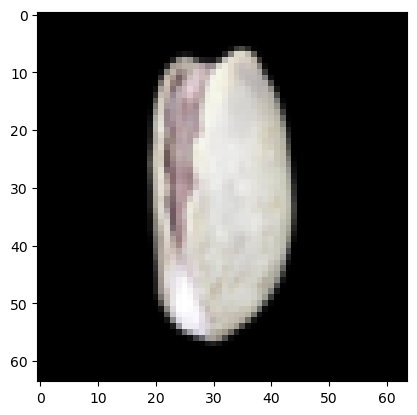

In [58]:
img, label = test_dataset[100]
plt.imshow(img.permute((1, 2, 0)))
print(label)
#780

In [45]:
from PIL import Image
from torch import nn, save, load

In [59]:
from torchvision.transforms import ToTensor
# img = Image.open('horse.jpeg') 
input_size = 64 * 64 * 3
# plt.imshow(img)
img,label = test_dataset[100]
img = img.view(-1, input_size)
img = np.array(img)
# img = img.resize((1, 32, 32, 3))
img_tensor = ToTensor()(img).unsqueeze(0)
print(torch.argmax(rbf_net(img_tensor)))

tensor(0)
